## What it does:

This packages receives a data frame and function that could have multiplicative terms and runs setpwise selection from this package.

https://github.com/talhahascelik/python_stepwiseSelection

## Install package

In [14]:
%%capture
!pip3 install git+git://github.com/gabriela-plantie/stepwise_formula

In [3]:
from stepwise_formula.stepwise import stepwise

In [4]:
import pandas as pd
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

## create table with simulated data

In [5]:
x1=np.random.normal(0,1,1000)
x2=np.random.normal(0,1,1000)
x3=np.random.normal(0,1,1000)
x4=np.random.normal(0,1,1000)/5

z=1 + 2*x1 + 3*x2 + 2*x2*x3 + x4
pr=1/(1+np.exp(-z))
y=sc.stats.binom.rvs(1, pr, size=1000)
df = pd.DataFrame(data={'y':y, 'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4})


## Define formula

In [6]:
formula = 'y ~ x1 + x2*x3*x4'

## Run stepwise using formula

In [7]:
a = stepwise(formula, df, 'logistic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.292915
         Iterations 8
Eliminated : x3
Optimization terminated successfully.
         Current function value: 0.292943
         Iterations 8
Eliminated : x2*x4
Optimization terminated successfully.
         Current function value: 0.293177
         Iterations 8
Eliminated : x3*x4
Optimization terminated successfully.
         Current function value: 0.293655
         Iterations 8
Eliminated : x2*x3*x4
Optimization terminated successfully.
         Current function value: 0.294603
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Mon, 05 Oc

## filter final list of variables by pvalue

In [8]:
np.round(a[2].params[a[2].pvalues<0.01],2)

intercept    1.12
x1           2.17
x2           3.33
x2*x3        2.10
dtype: float64

## generate model with resulting varibles

In [9]:
formula = 'y ~ x1 + x2 + x2:x3'
model = smf.glm(formula = formula, data=df, family=sm.families.Binomial())
mod = model.fit()

In [10]:
np.round(mod.params[mod.pvalues<0.01],2)

Intercept    1.09
x1           2.12
x2           3.27
x2:x3        2.07
dtype: float64

In [11]:
pred=mod.predict(df)

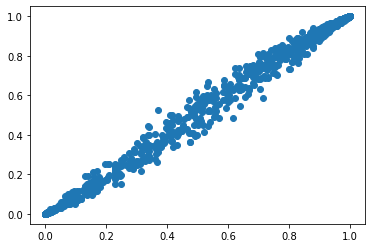

In [12]:
plt.scatter(pr, pred)

In [ ]:
#jupyter nbconvert README.ipynb --to markdown